# PERCEPTRON
Our model describe a linear classifier that divides the coordinate plane into two halves,
the line in the example is y=x.
We want to learn a parameter vector such that our model make the right prediction.
This model is called a linear perceptron.
The cost function minimize the distance in the two norm.

In [3]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot

In [5]:
def activaction(t): return (1-np.exp(-t))/(1+np.exp(-t))
def neuron(w,b,x):return activaction(np.inner(w,x)+b)

In [7]:
#Train the neuron with some good data
data = np.array([[[1,1.5],+1],
       [[3,4],+1],
       [[4,3],-1],
       [[1.5,1],-1]],dtype=object)
data = np.array([[[-2,8.5],+1],
       [[-3.6,12],-1],
       [[2,-5],-1],
       [[3,-6.5],+1]],dtype=object)

print(data[0,0])
print(data[1,0])
dataset = np.random.randn(100,2) #random distribution of normal distributed points

[-2, 8.5]
[-3.6, 12]


In [9]:
def cost(x):
    w=x[0:2]
    b=x[2]
    c=0
    for k in range(len(data)):
        c +=(neuron(w,b,data[k,0])-data[k,1])**2#error between the computed output and the real output
    return c

In [11]:
x0 = np.array([1.,1.,1.]);
opt = scipy.optimize.minimize(cost,x0).x;
print(opt)
scipy.optimize.minimize(cost,x0).message

[ 38.68218971  12.80356415 -22.56047596]


'Optimization terminated successfully.'

In [13]:
def neuronopt(x): return neuron(opt[0:2],opt[2],x);
neuronopt([2,1])

1.0

In [15]:
datatest1 = np.array([p for p in dataset if neuronopt(p)>0])
datatest2 = np.array([p for p in dataset if neuronopt(p)<0])


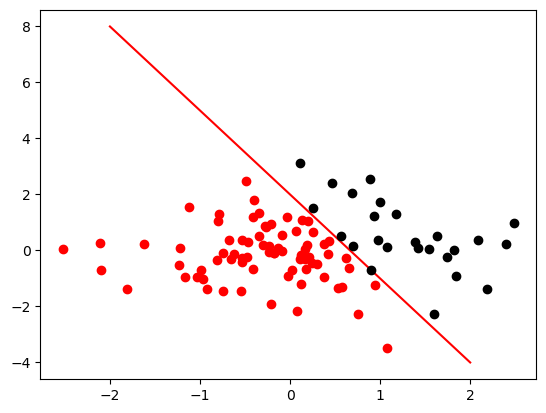

In [17]:
#matplotlib.pyplot.plot([-2,2],[-2,2],'r', datatest1[::,0], datatest1[::,1],'ko',  datatest2[::,0], datatest2[::,1],'ro');

matplotlib.pyplot.plot([-2,2],[8,-4],'r', datatest1[::,0], datatest1[::,1],'ko',  datatest2[::,0], datatest2[::,1],'ro');

In [19]:
import numpy as np
def steep_desc(w,alfa,tol,data):
    (n,m)=data.shape
    (n1) = w.shape
    w31 = np.copy(w)
    w1 = w31[0:2]
    b1 = w31[2]
    nitmax = 60000
    err=1
    nit=0
    while err > tol and nit < nitmax:
        nit=nit+1
        w30 = np.copy(w31)
        w0 = np.copy(w1)
        b0 = np.copy(b1)
        w1 = np.copy(w0)
        b1 = np.copy(b0)
        for k in range(n):
            yk = neuron(w0,b0,data[k,0]) 
            w1 = w1 - alfa*(yk-data[k,1])*np.asarray(data[k,0])*(1-yk**2)/2
            b1 = b1 - alfa*(yk-data[k,1])*(1-yk**2)/2
        w31[0:2] = w1
        w31[2] = b1
        err =  np.max(abs(w31-w30)/(1+abs(w30)))
      
    print('nit',nit,err,w1,b1)
    return w31  

In [103]:
x0 = np.array([1.,0.,-1.])
x0 = np.random.randn(3)
opt = scipy.optimize.minimize(cost,x0);
print(opt.x)
print(opt.message)
print(opt.nit,opt.fun)
optw = steep_desc(x0,0.1, 1e-4,data)
print(optw,cost(optw))

[ 37.16734966  12.30788491 -21.89516503]
Optimization terminated successfully.
25 7.225911308016973e-07
nit 1719 9.996344749260386e-05 [10.96420466  3.61433235] -6.397726222808912
[10.96420466  3.61433235 -6.39772622] 0.08134518151684482


In [105]:
def neuronoptw(x): return neuron(optw[0:2],optw[2],x);

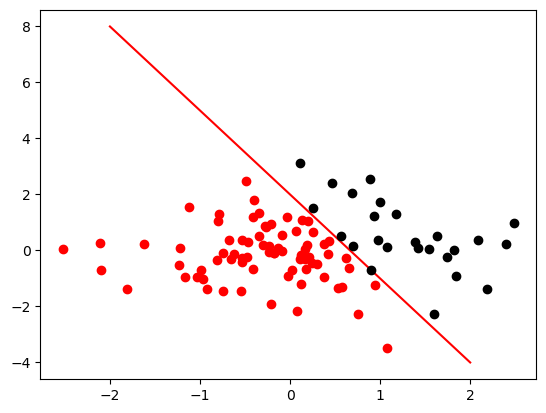

In [107]:
datatest1w = np.array([p for p in dataset if neuronoptw(p)>0])
datatest2w = np.array([p for p in dataset if neuronoptw(p)<0])
#matplotlib.pyplot.plot([-2,2],[-2,2],'r', datatest1w[::,0], datatest1w[::,1],'ko',  datatest2w[::,0], datatest2w[::,1],'ro');

matplotlib.pyplot.plot([-2,2],[8,-4],'r', datatest1w[::,0], datatest1w[::,1],'ko',  datatest2w[::,0], datatest2w[::,1],'ro');

In [145]:
import numpy as np
def steep_desc_alfa(w,tol,data):
    alfa = 1
    rho=0.01
    c=1e-4
    (n,m)=data.shape
    (n1) = w.shape
    w31 = np.copy(w)
    pk=np.copy(w)
    w1 = w31[0:2]
    b1 = w31[2]
    nitmax = 50000
    err=1
    nit=0
    while err > tol and nit < nitmax:
        nit=nit+1
        w30 = np.copy(w31)
        w0 = np.copy(w1)
        b0 = np.copy(b1)
        w1 = np.copy(w0)
        b1 = np.copy(b0)
        
        pk[0:3] = 0       
        for k in range(n):
            yk = neuron(w0,b0,data[k,0]) 
            pk[0:2] =pk[0:2] +(yk-data[k,1])*np.asarray(data[k,0])*(1-yk**2)/2
            pk[2]   =pk[2]   +(yk-data[k,1])*(1-yk**2)/2
        alfa = 1
       # Armijo condition with backtraking 
        while cost(w30-alfa*pk ) > cost(w30)-c*alfa*np.inner(pk,pk):
             alfa = rho*alfa
        alfa = max(alfa,1e-8)
        #print('nit=',nit,'alfa=',alfa)
        w1 = w1 - alfa*pk[0:2]
        b1 = b1 - alfa*pk[2]
        w31[0:2] = w1
        w31[2] = b1
        err =  np.max(abs(w31-w30)/(1+abs(w30)))
      
        #print('nit',nit,err,w1,b1)
    print('nit',nit,err,w1,b1)
    return w31  

In [147]:
optw1 = steep_desc_alfa(x0,1e-4,data)
print(optw1,cost(optw1))

nit= 1 alfa= 1
nit= 2 alfa= 1
nit= 3 alfa= 1
nit= 4 alfa= 1
nit= 5 alfa= 0.1
nit= 6 alfa= 0.010000000000000002
nit= 7 alfa= 0.010000000000000002
nit= 8 alfa= 0.010000000000000002
nit= 9 alfa= 0.010000000000000002
nit= 10 alfa= 0.010000000000000002
nit= 11 alfa= 0.010000000000000002
nit= 12 alfa= 0.1
nit= 13 alfa= 0.010000000000000002
nit= 14 alfa= 0.1
nit= 15 alfa= 0.010000000000000002
nit= 16 alfa= 0.010000000000000002
nit= 17 alfa= 0.1
nit= 18 alfa= 0.010000000000000002
nit= 19 alfa= 0.1
nit= 20 alfa= 0.010000000000000002
nit= 21 alfa= 0.010000000000000002
nit= 22 alfa= 0.1
nit= 23 alfa= 0.010000000000000002
nit= 24 alfa= 0.1
nit= 25 alfa= 0.010000000000000002
nit= 26 alfa= 0.010000000000000002
nit= 27 alfa= 0.1
nit= 28 alfa= 0.010000000000000002
nit= 29 alfa= 0.1
nit= 30 alfa= 0.010000000000000002
nit= 31 alfa= 0.1
nit= 32 alfa= 0.010000000000000002
nit= 33 alfa= 0.010000000000000002
nit= 34 alfa= 0.1
nit= 35 alfa= 0.010000000000000002
nit= 36 alfa= 0.1
nit= 37 alfa= 0.0100000000000

In [113]:
datatest1w1 = np.array([p for p in dataset if neuronoptw1(p)>0])
datatest2w1 = np.array([p for p in dataset if neuronoptw1(p)<0])


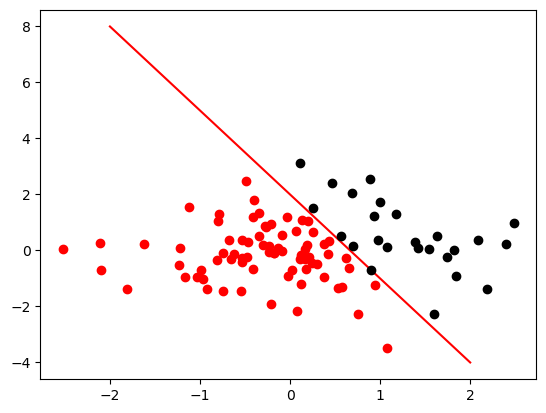

In [115]:
#matplotlib.pyplot.plot([-2,2],[-2,2],'r', datatest1w1[::,0], datatest1w1[::,1],'ko',  datatest2w1[::,0], datatest2w1[::,1],'ro');

matplotlib.pyplot.plot([-2,2],[8,-4],'r', datatest1w1[::,0], datatest1w1[::,1],'ko',  datatest2w1[::,0], datatest2w1[::,1],'ro');

Exercise: Implement the backtraking approach for the comoputation of the step-length at each iteration of the line search method that uses the steepest direction. Compare the results with the method that uses a constant value of the step-length.
